<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


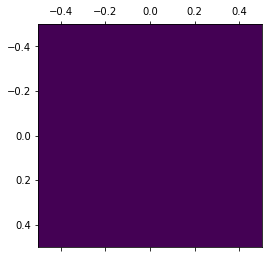

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


,Value
Value,1.0


In [6]:
import numpy as np
import pandas as pd
data1=pd.read_csv("BrentOilPrices.csv")
data1.head(3)
bop_cr=data1.corr()
bop_cr
data1.info()


import matplotlib.pyplot as plt
plt.matshow(data1.corr())
plt.show()

data2=pd.read_csv("gold_price_data.csv")
data2.head(3)
data2.info()


gp_cr=data2.corr()
gp_cr


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  219 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           321 non-null    float64
 13  Fish           321 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


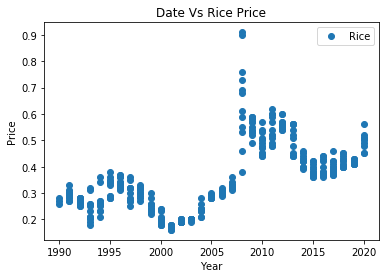

coefficient of determination: r_sq= 0.36227666332716424
predicted response:
[0.22633095 0.38592161 0.29726013 0.37705546 0.28839398 0.30612628
 0.39478776 0.26179554 0.24406325 0.30612628 0.2351971  0.48344923
 0.34159087 0.47458309 0.32385857 0.37705546 0.32385857 0.33272472
 0.27066169 0.43911849 0.36818931 0.4036539  0.25292939 0.30612628
 0.39478776 0.4213862  0.27952784 0.27952784 0.2351971  0.29726013
 0.4036539  0.43025235 0.26179554 0.26179554 0.26179554 0.28839398
 0.31499243 0.43025235 0.43025235 0.30612628 0.2351971  0.36818931
 0.36818931 0.41252005 0.39478776 0.43911849 0.41252005 0.27066169
 0.27066169 0.45685079 0.41252005 0.31499243 0.35045702 0.37705546
 0.22633095 0.27066169 0.37705546 0.41252005 0.45685079 0.38592161
 0.26179554 0.29726013 0.32385857 0.26179554 0.35932317 0.33272472
 0.4036539  0.35045702 0.45685079 0.36818931 0.27066169 0.31499243]
coefficient of determination: r_sq= 0.4952207204242437


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import datetime as dt
data=pd.read_csv("historic_groceries.csv")
data.info()
data.tail()
data.isnull().any() # to find null value
data = data.fillna(method='ffill') # to fill null value
data["date"]=pd.date_range(start="1990-10-01", end="2020-09-30", freq="M")
data['date'] = pd.DatetimeIndex(data['date']).year
data
x = np.array(data['date']).reshape((-1, 1))
y = np.array(data['Rice'])
data.plot(x='date', y='Rice', style='o')  
plt.title('Date Vs Rice Price')  
plt.xlabel('Year')  
plt.ylabel('Price')  
plt.show()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination: r_sq=', r_sq)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)
x_poly
lin_reg2=LinearRegression().fit(x_poly, y_train)
r_sq = lin_reg2.score(x_poly, y_train)
print('coefficient of determination: r_sq=', r_sq)


1895.0


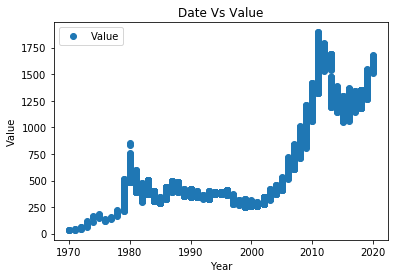

coefficient of determination: r_sq= 0.5817420426233174
intercept: -54566.782552157296
predicted response:
[ 901.81953658  736.07670166 1122.80998315 ...  901.81953658  155.97677941
  901.81953658]
[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]
[1233.30520644 1260.92901226 1288.55281808 1316.1766239  1343.80042972
 1371.42423554]


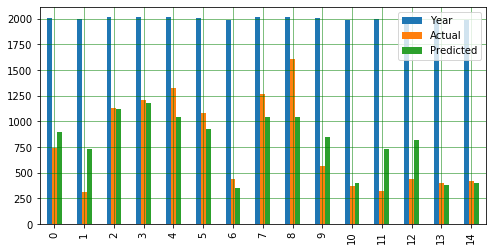

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib.pyplot import figure
import datetime as dt
data=pd.read_csv("gold_price_data.csv")
data.head(15)
data['year'] = pd.DatetimeIndex(data['Date']).year
x = np.array(data['year']).reshape((-1, 1))
y = np.array(data['Value'])
print(y.max())
data.plot(x='year', y='Value', style='o')  
plt.title('Date Vs Value')  
plt.xlabel('Year')  
plt.ylabel('Value')  
plt.show()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination: r_sq=', r_sq)
print('intercept:', model.intercept_)
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
x_new=np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)
df = df.head(15)
df.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


coefficient of determination: r_sq= 0.7861148778842066
predicted response:
[ 821.39801012  540.36949772 1340.30817194 ...  821.39801012  431.13679178
  821.39801012]


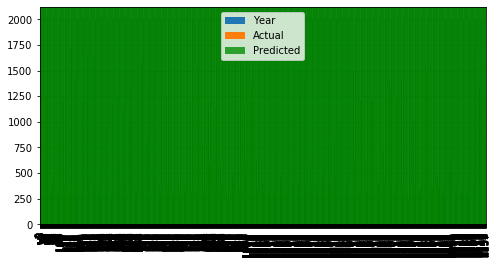

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]
[1655.28198273 1739.33591059 1825.42675599 1913.51088277 2003.54465464
 2095.48443538]


In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression().fit(x_poly, y_train)
r_sq = lin_reg2.score(x_poly, y_train)
print('coefficient of determination: r_sq=', r_sq)
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_test))
print('predicted response:', y_pred, sep='\n')
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
df.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
x_new=np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)
y_new=lin_reg2.predict(poly_reg.fit_transform(x_new))
print(y_new)


Question No 4(Code)
CODE (Polynomial Regression) Oil Analysis:


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib.pyplot import figure
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression().fit(x_poly, y_train)
r_sq = lin_reg2.score(x_poly, y_train)
print('coefficient of determination: r_sq=', r_sq)
x_new=np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)
y_new=lin_reg2.predict(poly_reg.fit_transform(x_new))
print(y_new)
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


coefficient of determination: r_sq= 0.7861148778842066
[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]
[1655.28198273 1739.33591059 1825.42675599 1913.51088277 2003.54465464
 2095.48443538]


,Year,Actual,Predicted
0,2008,741.25,821.398010
1,2002,310.75,540.369498
2,2016,1134.60,1340.308172
3,2018,1211.85,1493.459425
4,2013,1323.00,1127.603624
...,...,...,...
2153,2010,1350.25,936.373143
2154,2006,627.00,716.839632
2155,2008,877.00,821.398010
2156,1981,482.50,431.136792


CODE (Polynomial Regression) Gold Analysis:

coefficient of determination: r_sq= 0.7861148778842066
predicted response:
[ 821.39801012  540.36949772 1340.30817194 ...  821.39801012  431.13679178
  821.39801012]


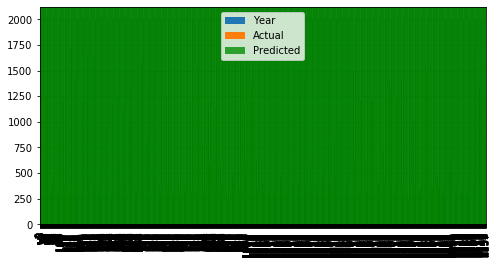

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]
[1655.28198273 1739.33591059 1825.42675599 1913.51088277 2003.54465464
 2095.48443538]


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression().fit(x_poly, y_train)
r_sq = lin_reg2.score(x_poly, y_train)
print('coefficient of determination: r_sq=', r_sq)
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_test))
print('predicted response:', y_pred, sep='\n')
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
df.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
x_new=np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)
y_new=lin_reg2.predict(poly_reg.fit_transform(x_new))
print(y_new)


In [12]:
#Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


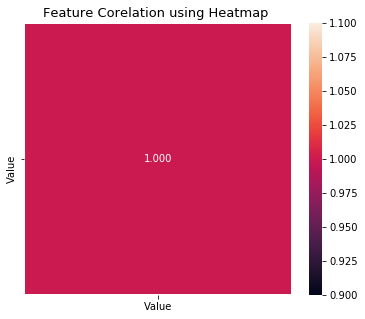

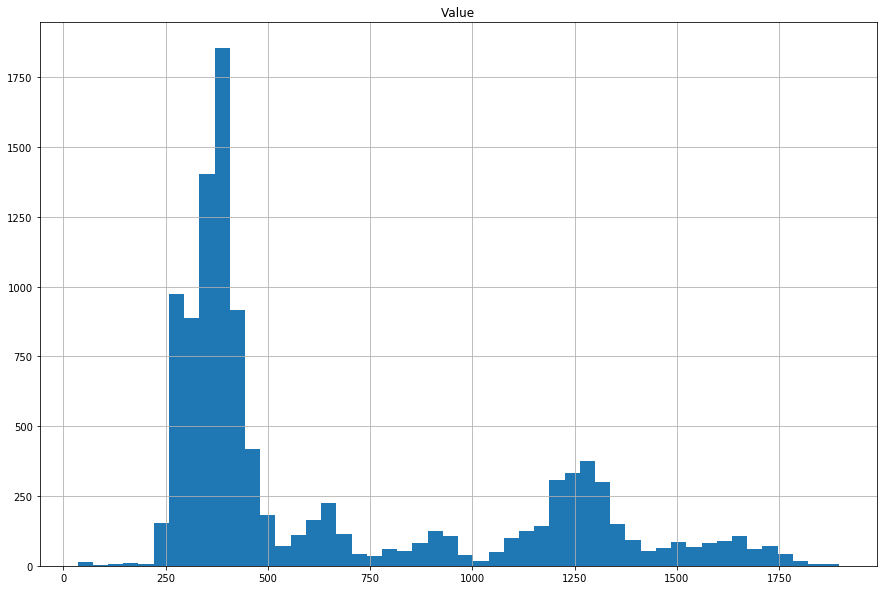

Skewness: %f 1.0444320698012861
Kurtosis: -0.396533


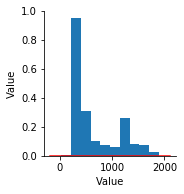

In [13]:
import numpy as np 
# data processing
import pandas as pd 
import numpy as np
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
df=pd.read_csv("gold_price_data.csv")
df.head()
df.info()
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2)
plt.title('Feature Corelation using Heatmap ', y = 1.12, size=13, loc="center")
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()
sns.pairplot(df.loc[:,df.dtypes == 'float64'])
sns.distplot(df['Value'], color = 'red')
print('Skewness: %f', df['Value'].skew())
print("Kurtosis: %f" % df['Value'].kurt())


In [14]:
# K Mean Clustering:

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
features[:1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:1]
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
kmeans.inertia_


# Final locations of the centroid
kmeans.cluster_centers_





# The number of iterations required to converge
kmeans.n_iter_
kmeans.labels_[:1]
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


NameError: name 'features' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('gold_price_data.csv')
df = df.iloc[:, [0, 1]].values
print("Number of rows and columns:", df.shape)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [16]:
# K-Fold 

In [17]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

# pandas — Allows easy manipulation of data structures.
# numpy — Allows scientific computing.
# sklearn — A machine learning library for python.
# Reading the data set
# Now, lets read the data set we will be using, to a pandas data frame.


In [18]:
dataset = pandas.read_csv('BrentOilPrices.csv')
dataset
#Pre-processing
# We will now specify the features and the output variable of our data set.
X=dataset["Date"]
y=dataset["Price"]
#  K-Fold CV
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)


Train Index:  [ 856  857  858 ... 8551 8552 8553] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [19]:
#gold_price_data.csv

In [20]:
dataset = pandas.read_csv('gold_price_data.csv')
dataset
#Pre-processing
# We will now specify the features and the output variable of our data set.
X1=dataset["Date"]
y1=dataset["Value"]
#  K-Fold CV
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X1):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)


Train Index:  [ 1079  1080  1081 ... 10784 10785 10786] 

Test Index:  [   0    1    2 ... 1076 1077 1078]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [1079 1080 1081 ... 2155 2156 2157]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [2158 2159 2160 ... 3234 3235 3236]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [3237 3238 3239 ... 4313 4314 4315]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [4316 4317 4318 ... 5392 5393 5394]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [5395 5396 5397 ... 6471 6472 6473]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [6474 6475 6476 ... 7550 7551 7552]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [7553 7554 7555 ... 8628 8629 8630]
Train Index:  [    0     1     2 ... 10784 10785 10786] 

Test Index:  [8631 8632 8633 ... 9706 9707 9708]
Train Index:  [   0    1    2 ... 970

In [21]:
# historic_groceries.csv

In [22]:
dataset = pandas.read_csv('historic_groceries.csv')
dataset
X2 = dataset.iloc[:, [0, 14]]
y2 = dataset.iloc[:, 15]
#  K-Fold CV
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X2):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)


Train Index:  [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 